In [2]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:2px;}
div.CodeMirror {font-family:Consolas; font-size:10pt;}
div.text_cell_render.rendered_html{font-size:10pt;}
div.output {font-size:10pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:10pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:11pt;padding:4px;}
table.dataframe{font-size:10px;}
</style>
"""))

# 1. tensorflow v2.xx에서 v1사용하기

In [5]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()  # v2를 비활성화하고, v1활성화
import numpy as np
import pandas as pd

## Tensorflow
- 데이터 흐름 그래프(tensor객체의 흐름)
- 이 그래프는 node(상수, 변수, 연산)와 edge로 구성
- sess = tf.Session()으로 실행
- sess.run()을 통해 값을 확인

In [7]:
# tensor = data(상수, 변수)와 연산
node1 = tf.constant('Hello, Tensorflow')
sess = tf.Session()
print(sess.run(node1))

b'Hello, Tensorflow'


In [9]:
# 간단한 연산 tensor 그래프
node1 = tf.constant(10, dtype=tf.float16)
node2 = tf.constant(20, dtype=tf.float16)
node3 = tf.add(node1, node2)
sess = tf.Session()
print(sess.run([node1, node2, node3]))

[10.0, 20.0, 30.0]


In [10]:
# 타입 변경
node1 = tf.constant(np.array([1,2,3]), dtype=tf.int16)
node2 = tf.cast(node1, dtype=tf.float32)
sess = tf.Session()
sess.run([node1, node2])

[array([1, 2, 3], dtype=int16), array([1., 2., 3.], dtype=float32)]

In [11]:
# 평균값 계산 : tf.reduce_mean()
data = np.array([1., 2., 3.])
tensor = tf.reduce_mean(data)
sess = tf.Session()
sess.run(tensor)

2.0

In [93]:
# 랜덤값을 갖는 tensor
a = tf.random_normal([1]) # 평균0, 표준편차가 1인 난수 실수 2개(정규분포이루는 난수)
b = tf.random_normal([1])
sess = tf.Session()
sess.run([a,b])

[array([-0.33981815], dtype=float32), array([-0.16630673], dtype=float32)]

In [94]:
w = tf.Variable(tf.random.normal([1]))
sess = tf.Session()
sess.run(tf.global_variables_initializer())  # w변수의 난수 초기화
sess.run(w)

array([0.47754574], dtype=float32)

# 2. tensorflow v1을 이용한 linear regression을 구현
## 2.1 입력(독립)변수 x가 1개, 타켓(종속)변수 y가 1개

In [103]:
x = np.array([1,2,3])
y = np.array([2,3,4])
# weight와 bias(처음엔 랜덤값으로 셋팅, 학습과정에서 변경)
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')
# Hypothesis : 예측값
H = W*x + b
# cost function(손실함수 = mes; 최소제곱법)
cost = tf.reduce_mean(tf.square(H-y))
'''
학습목적 : cost가 최소가 되는 W, b흫 찾아내는 것
cost는 2차함수이므로 곡선그래프. 곡선위 미분값이 줄어드는 방향으로 학습(경사하강)
=> GradientDescentOptimizer
'''
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
# Session 생성
sess = tf.Session()
# W, b변수 노드에 초기화
sess.run(tf.global_variables_initializer())
# 5000번 학습 (v2에서는 fit함수)
for step in range(5001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b])
    if step%200 == 0:
        print("{}번째 cost:{}, W:{}, b:{}".format(step,
                                               cost_val,
                                               W_val,
                                               b_val))

0번째 cost:49.739803314208984, W:[-1.466767], b:[-0.004493]
200번째 cost:0.00025129070854745805, W:[0.98163307], b:[1.0417525]
400번째 cost:9.595383744454011e-05, W:[0.9886504], b:[1.0258002]
600번째 cost:3.6639143218053505e-05, W:[0.9929867], b:[1.0159429]
800번째 cost:1.399013399350224e-05, W:[0.9956662], b:[1.0098516]
1000번째 cost:5.342281383491354e-06, W:[0.9973219], b:[1.0060879]
1200번째 cost:2.040090066657285e-06, W:[0.9983451], b:[1.003762]
1400번째 cost:7.790731615386903e-07, W:[0.9989773], b:[1.0023249]
1600번째 cost:2.9763251063741336e-07, W:[0.99936783], b:[1.0014371]
1800번째 cost:1.138815264312143e-07, W:[0.999609], b:[1.0008888]
2000번째 cost:4.365831429709033e-08, W:[0.99975795], b:[1.0005505]
2200번째 cost:1.6764929000601114e-08, W:[0.99984986], b:[1.0003408]
2400번째 cost:6.5494085710327e-09, W:[0.9999064], b:[1.0002131]
2600번째 cost:2.5315880503029575e-09, W:[0.9999417], b:[1.0001323]
2800번째 cost:9.813163615035592e-10, W:[0.99996376], b:[1.0000824]
3000번째 cost:4.33914237873978e-10, W:[0.99997

In [97]:
# 최종적으로 나온 회귀식 : H= W*x + b
sess.run([W, b])

[array([-0.23012753], dtype=float32), array([-1.8035388], dtype=float32)]

In [99]:
W_, b_ = sess.run([W,b])
W_[0],b_[0]

(-0.23012753, -1.8035388)

In [100]:
def predict(x):
    return W_[0]*x + b_[0]

In [101]:
input_x = int(input('입력값은 ?'))
print('예측값은 : ',predict(input_x))

입력값은 ?3
예측값은 :  -2.493921384215355


## 2.2 predict를 위한 placeholder이용
- placeholder : 텐서플로우 외부에서 데이터를 입력받는 노드

In [105]:
# x = np.array([1,2,3])
x = tf.placeholder(tf.float16)
H = 1 * x + 1
sess = tf.Session()
sess.run(H, feed_dict={x:5})
sess.run(H, feed_dict={x:np.array([1,2,3])})

array([2., 3., 4.], dtype=float16)

In [107]:
# H = 2x + 1
x_data = np.array([1,2,3,5,8])
y_data = np.array([3,5,7,11,17])
# placeholder 설정 (입력면수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis (예측값)
H = W*x + b
# 손실함수
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화
# 5000번 학습
for step in range(5001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], feed_dict={x:x_data,
                                                                        y:y_data})
    if step%200 == 0:
        print('{}번쩨 : cost:{}, W:{}, b:{}'.format(step, cost_val, W_val, b_val))

0번쩨 : cost:231.061279296875, W:[0.19350386], b:[0.3825117]
200번쩨 : cost:0.002171077998355031, W:[2.0158458], b:[0.9153046]
400번쩨 : cost:0.00021354496129788458, W:[2.0049696], b:[0.97343767]
600번쩨 : cost:2.1004279915359803e-05, W:[2.0015585], b:[0.99166954]
800번쩨 : cost:2.066095021291403e-06, W:[2.000489], b:[0.99738723]
1000번쩨 : cost:2.0338711692602374e-07, W:[2.0001533], b:[0.99918044]
1200번쩨 : cost:1.9964591757570815e-08, W:[2.0000482], b:[0.99974287]
1400번쩨 : cost:1.9826984498649836e-09, W:[2.000015], b:[0.9999194]
1600번쩨 : cost:2.0305605807902083e-10, W:[2.000005], b:[0.99997383]
1800번쩨 : cost:3.029754225281067e-11, W:[2.000002], b:[0.9999902]
2000번쩨 : cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
2200번쩨 : cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
2400번쩨 : cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
2600번쩨 : cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
2800번쩨 : cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
3000번쩨 : 

In [108]:
# 예측하기
sess.run(H, feed_dict={x:5})

array([11.000001], dtype=float32)

In [109]:
sess.run(H, feed_dict={x:np.array([5,6,7])})

array([11.000001, 13.000002, 15.000004], dtype=float32)

## 2.3 scale이 다른 데이터의 linear regression 구현(scale조정x)

In [112]:
x_data = np.array([1,2,3,5,8])
y_data = np.array([3,15,68,80,95])
# placeholder 설정 (입력면수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis (예측값)
H = W*x + b
# 손실함수
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화
# 5000번 학습
for step in range(2001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], feed_dict={x:x_data,
                                                                        y:y_data})
    if step%200 == 0:
        print('{}번쩨 : cost:{}, W:{}, b:{}'.format(step, cost_val, W_val, b_val))

0번쩨 : cost:4303.68994140625, W:[5.462146], b:[0.3820591]
200번쩨 : cost:265.61456298828125, W:[13.177744], b:[2.0907345]
400번쩨 : cost:265.61077880859375, W:[13.162713], b:[2.1710787]
600번쩨 : cost:265.6104736328125, W:[13.157999], b:[2.1962774]
800번쩨 : cost:265.61041259765625, W:[13.15652], b:[2.2041798]
1000번쩨 : cost:265.61041259765625, W:[13.156056], b:[2.2066598]
1200번쩨 : cost:265.6103515625, W:[13.1559105], b:[2.2074366]
1400번쩨 : cost:265.61041259765625, W:[13.155866], b:[2.2076771]
1600번쩨 : cost:265.61041259765625, W:[13.155853], b:[2.20775]
1800번쩨 : cost:265.6103515625, W:[13.15585], b:[2.2077618]
2000번쩨 : cost:265.6103515625, W:[13.15585], b:[2.2077618]


In [ ]:
# cost 값이 멈춤 : local 최소값

## 2.4 scale이 다른 데이터의 liner regression을 구현(조정O)
### scale을 맞추기 : 모든 데이터를 일정 범위내로 조정
- normalization(정규화) : 0~1로 조정
                        X ─ Xmin
    normalization = ─────────────────
                       Xmax ─ Xmin
           * 위의 식을 써도 되지만 라이브러리를 씀(sklearn.lpreproxessing.MinMaxScaler이용)
           
- standardization(표준화) : 평균0, 표준편차1로 조정
                        X - Xmean(평균)
    standardization = ──────────────────
                         Xstd(표준편차)
           * 위의 식을 써도 되지만 라이브러리를 쓰 (sklearn.lpreproxessing.StandardScaler이용)

In [128]:
# 라이브럴를 쓰지 않고 정규화
x_data = np.array([1,2,5,8,10])
y_data = np.array([3,15,68,80,95])
scaled_x_data = (x_data - x_data.min() ) / (x_data.max() - x_data.min())
scaled_y_data = (y_data - y_data.min() ) / (y_data.max() - y_data.min())
print(scaled_x_data)
print(scaled_y_data)

[0.         0.11111111 0.44444444 0.77777778 1.        ]
[0.         0.13043478 0.70652174 0.83695652 1.        ]


In [160]:
# 라이브러리를 쓰고 정규화 (MinMaxScaler이용)
x_data = np.array([1,2,5,8,10]).reshape(-1, 1)
y_data = np.array([3,15,68,80,95]).reshape(-1,1)
# np.column_stack([x_data, y_data])
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler() # x_data를 정규화시킬 객체
# scaler_x.fit(x_data)
# scaled_x_data = scaler_x.transform(x_data)
scaled_x_data = scaler_x.fit_transform(x_data)
scaler_y = MinMaxScaler() # y_data를 정규화시킬 객체
scaled_y_data = scaler_y.fit_transform(y_data)
np.column_stack([x_data, y_data, scaled_x_data, scaled_y_data])

array([[ 1.        ,  3.        ,  0.        ,  0.        ],
       [ 2.        , 15.        ,  0.11111111,  0.13043478],
       [ 5.        , 68.        ,  0.44444444,  0.70652174],
       [ 8.        , 80.        ,  0.77777778,  0.83695652],
       [10.        , 95.        ,  1.        ,  1.        ]])

In [168]:
# placeholder 설정 (입력변수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis(예측값)
H = W*x + b
# 손실함수
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)
# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화
# 12000번 학습
for step in range(15001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], 
                                         feed_dict={x:scaled_x_data,
                                                   y:scaled_y_data})
    if step%600 == 0:
        print('{}째 : cost:{}, W:{}, b:{}'.format(step, cost_val, W_val, b_val))

0째 : cost:0.367155522108078, W:[0.39628375], b:[0.89908874]
600째 : cost:0.0989920049905777, W:[0.33960435], b:[0.5318376]
1200째 : cost:0.0681990534067154, W:[0.39626354], b:[0.413078]
1800째 : cost:0.05351833254098892, W:[0.46922618], b:[0.35467228]
2400째 : cost:0.04284844920039177, W:[0.53796965], b:[0.3139191]
3000째 : cost:0.03480241075158119, W:[0.59893036], b:[0.2807265]
3600째 : cost:0.02871985174715519, W:[0.6522033], b:[0.25236624]
4200째 : cost:0.02412082627415657, W:[0.698586], b:[0.22781792]
4800째 : cost:0.02064347267150879, W:[0.738931], b:[0.20649709]
5400째 : cost:0.018014248460531235, W:[0.77401537], b:[0.18796337]
6000째 : cost:0.016026267781853676, W:[0.8045235], b:[0.1718487]
6600째 : cost:0.014523139223456383, W:[0.83105195], b:[0.15783665]
7200째 : cost:0.01338660717010498, W:[0.8541199], b:[0.1456526]
7800째 : cost:0.012527281418442726, W:[0.87417805], b:[0.13505797]
8400째 : cost:0.01187752652913332, W:[0.89161974], b:[0.12584548]
9000째 : cost:0.011386252008378506, W:[0.906

In [169]:
# 예측 : 모델에 scale 조정된 값으로 예측=>scale 조정된 y값
scaled_input = scaler_x.transform(np.array([[2],
                                            [3]]))
print('모델 예측을 위한 입력 :', scaled_input, sep='\n')
scaled_output = sess.run(H, feed_dict={x:scaled_input})
print('모델 예측 결과 :', scaled_output, sep='\n')
print('결과 :', scaler_y.inverse_transform(scaled_output), sep='\n')

모델 예측을 위한 입력 :
[[0.11111111]
 [0.22222222]]
모델 예측 결과 :
[[0.18684632]
 [0.2960567 ]]
결과 :
[[20.189861]
 [30.237215]]


In [170]:
# x_data들의 예측값
scaled_y_hat = sess.run(H, feed_dict={x:scaled_x_data})
y_hat = scaler_y.inverse_transform(scaled_y_hat)

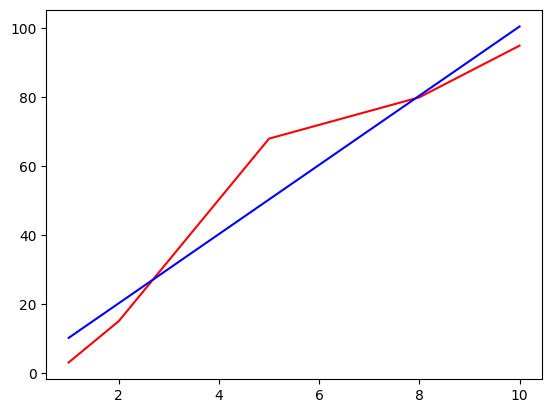

In [171]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'r')
plt.plot(x_data, y_hat, 'b')

In [173]:
# 라이브러리를 사용하여 표준화(standardScaler 사용)
x_data = np.array([1,2,5,8,10]).reshape(-1,1)
y_data = np.array([3,15,68,80,95]).reshape(-1,1)

from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler() # x_data를 표준화할 객체
scaler_y = StandardScaler() # y_data를 표준화할 객체
scaled_x_data = scaler_x.fit_transform(x_data)
scaled_y_data = scaler_y.fit_transform(y_data)
print(np.column_stack([x_data, y_data]))
print(np.column_stack([scaled_x_data, scaled_y_data]))

[[ 1  3]
 [ 2 15]
 [ 5 68]
 [ 8 80]
 [10 95]]
[[-1.22474487 -1.34819316]
 [-0.93313895 -1.01936556]
 [-0.05832118  0.43295634]
 [ 0.81649658  0.76178394]
 [ 1.39970842  1.17281844]]


In [174]:
# placeholder 설정 (입력변수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis(예측값)
H = W*x + b
# 손실함수
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)
# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화
# 12000번 학습
for step in range(12001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], 
                                         feed_dict={x:scaled_x_data,
                                                   y:scaled_y_data})
    if step%600 == 0:
        print('{}째 : cost:{}, W:{}, b:{}'.format(step, cost_val, W_val, b_val))

0째 : cost:1.2306468486785889, W:[0.0769047], b:[-0.6074339]
600째 : cost:0.16838636994361877, W:[0.7000346], b:[-0.18273605]
1200째 : cost:0.07225169241428375, W:[0.88749176], b:[-0.0549729]
1800째 : cost:0.06355142593383789, W:[0.94388527], b:[-0.01653764]
2400째 : cost:0.06276405602693558, W:[0.9608503], b:[-0.00497505]
3000째 : cost:0.0626927986741066, W:[0.965954], b:[-0.00149665]
3600째 : cost:0.06268634647130966, W:[0.9674892], b:[-0.00045023]
4200째 : cost:0.0626857578754425, W:[0.96795106], b:[-0.00013544]
4800째 : cost:0.06268571317195892, W:[0.9680889], b:[-4.0735296e-05]
5400째 : cost:0.06268569827079773, W:[0.96813285], b:[-1.2244893e-05]
6000째 : cost:0.06268569082021713, W:[0.96813506], b:[-3.6652361e-06]
6600째 : cost:0.06268569082021713, W:[0.96813506], b:[-1.0842567e-06]
7200째 : cost:0.06268569082021713, W:[0.96813506], b:[-3.0647618e-07]
7800째 : cost:0.06268568336963654, W:[0.96813506], b:[-7.304958e-08]
8400째 : cost:0.06268569827079773, W:[0.96813506], b:[-1.107575e-08]
9000째 :

In [175]:
# x_data들의 예측값
scaled_y_hat = sess.run(H, feed_dict={x:scaled_x_data})
y_hat = scaler_y.inverse_transform(scaled_y_hat)

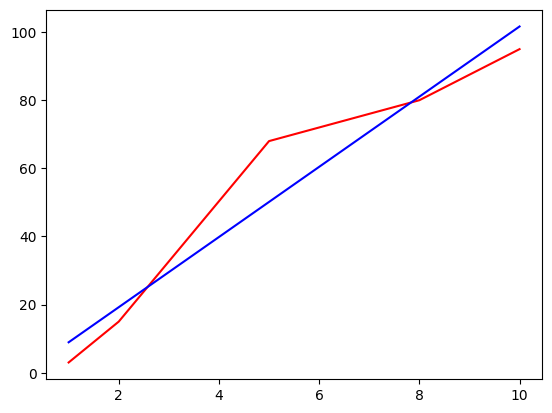

In [176]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'r')
plt.plot(x_data, y_hat, 'b')